In [6]:
# Import client library
from qdrant_client import QdrantClient
from sentence_transformers import SentenceTransformer, util
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

In [7]:
client = QdrantClient(url="http://qdrant.mavcode.io:6333", api_key="ADD KEY" )

/home/mvasquez/opt/miniconda3/envs/torch-2.5.1/lib/python3.12/site-packages/qdrant_client/qdrant_remote.py:130: UserWarning: Api key is used with an insecure connection.
  warnings.warn("Api key is used with an insecure connection.")


In [10]:
image = Image.open('two_dogs_in_snow.jpg')

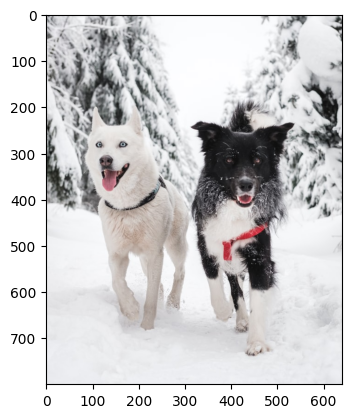

In [11]:
plt.imshow(image)

In [15]:
client.set_model("sentence-transformers/all-MiniLM-L6-v2")

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

In [16]:
# comment this line to use dense vectors only
client.set_sparse_model("prithivida/Splade_PP_en_v1")

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

In [20]:
if not client.collection_exists("startups"):
    client.create_collection(
        collection_name="startups",
        vectors_config=client.get_fastembed_vector_params(),
        # comment this line to use dense vectors only
        sparse_vectors_config=client.get_fastembed_sparse_vector_params(),  
    )

In [17]:
import json

payload_path = "startups_demo.json"
metadata = []
documents = []

with open(payload_path) as fd:
    for line in fd:
        obj = json.loads(line)
        documents.append(obj.pop("description"))
        metadata.append(obj)

In [ ]:
from tqdm import tqdm
client.add(
    collection_name="startups",
    documents=documents[1000:2000],
    metadata=metadata[1000:2000],
    parallel=16,
    ids=tqdm(range(len(documents))), 
)

In [23]:
from qdrant_client import QdrantClient


class HybridSearcher:
    DENSE_MODEL = "sentence-transformers/all-MiniLM-L6-v2"
    SPARSE_MODEL = "prithivida/Splade_PP_en_v1""
    def __init__(self, collection_name):
        self.collection_name = collection_name
        # initialize Qdrant client
        self.qdrant_client = QdrantClient(url="http://qdrant.mavcode.io:6333", api_key="ADD KEY" )
        self.qdrant_client.set_model(self.DENSE_MODEL)
        # comment this line to use dense vectors only
        self.qdrant_client.set_sparse_model(self.SPARSE_MODEL)
        
    def search(self, text: str):
        search_result = self.qdrant_client.query(
        collection_name=self.collection_name,
        query_text=text,
        query_filter=None,  # If you don't want any filters for now
        limit=5,  # 5 the closest results)
        # `search_result` contains found vector ids with similarity scores 
        # along with the stored payload
        
        # Select and return metadata
        metadata = [hit.metadata for hit in search_result]
        return metadata

In [24]:
hybrid_searcher = HybridSearcher(collection_name="startups")

In [25]:
hybrid_searcher.search("Two dogs in the snow")

[{'link': 'http://www.kumfytailz.com',
  'document': 'Revolutionary Warming/Cooling Dog Apparel\nKumfyTailz combines well-known gel-pack technology (think human therapy applications, microwave or freeze it and put it on your knee or shoulder) with premium-quality dog harnesses and coats. We keep pets comfortable in any weather, for more outside play/walk ...',
  'images': 'https://d1qb2nb5cznatu.cloudfront.net/startups/i/257434-d3fc861a4401e34169f3da806ef2192b-thumb_jpg.jpg?buster=1377799352',
  'city': 'Chicago',
  'name': 'Kumfy Tailz',
  'alt': 'Kumfy Tailz -  pets'},
 {'document': 'Top Dog in Online Pet Product Discovery, acquired by FamilyPet in 2015\ndoggyloot is a super-simple eCommerce platform that sells curated pet products to a highly engaged customer base. We help dog-loving customers discover top-quality products every day at the most competitive prices with our daily emails, and make it convenient for ...',
  'link': 'http://www.doggyloot.com',
  'city': 'Chicago',
  'alt